In [1]:
import numpy as np
import matplotlib.pyplot as plt

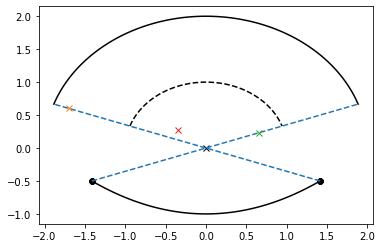

In [29]:
def parab(x):
    return x**2/4-1

def test1(x, R):
    return np.sqrt(R**2-x**2)

xlim1 = np.sqrt(2)
x = np.linspace(-xlim1, xlim1, 100)
y = parab(x)

plt.plot(x,y,color='k')
plt.plot(0,0,'x',color='k')
plt.plot(-xlim1,-0.5,'8',color='k')
plt.plot(xlim1,-0.5,'8',color='k')

m = 0.5/xlim1
xlim2 = np.sqrt(1/(1+m**2))
xlim3 = np.sqrt(2**2/(1+m**2))

x = np.linspace(-xlim1, xlim3, 100)
y = m*x
plt.plot(x,y, color=(43/256,119/256,177/256), linestyle='--')
y = m*x
plt.plot(-x,y, linestyle='--')

x = np.linspace(-xlim3, xlim3, 100)
y = test1(x, 2)
plt.plot(x, y, color='k')

x = np.linspace(-xlim2, xlim2, 100)
y = test1(x, 1)
plt.plot(x, y, color='k', linestyle='--')

x1 = 0.8
x2 = -0.3
x1proyec = -np.sqrt((x1+1)**2/(1+m**2))
y1proyec = -m*x1proyec
plt.plot(x1proyec,y1proyec,'x')

x2proyec = np.sqrt((x2+1)**2/(1+m**2))
y2proyec = m*x2proyec
plt.plot(x2proyec,y2proyec,'x')

centroidx = (x1proyec+x2proyec)/3
centroidy = (y1proyec+y2proyec)/3
plt.plot(centroidx,centroidy,'x')

plt.show()       


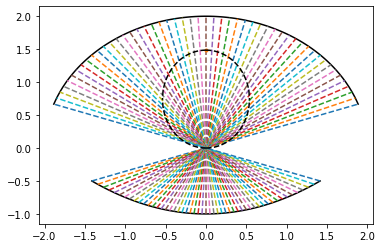

In [21]:
def multiDrepresentation(matrix):       #Rows--> dimensions, columns--> elements
        ndim = matrix.shape[0]
        nelem = matrix.shape[1]

        lim1 = np.sqrt(2)                                                           #Drawing the lower parabola + central point
        plt.plot(0,0,"P",color='k')
        x = np.linspace(-lim1, lim1, 100)
        plt.plot(x,x**2/4-1,color='k')
        mainangle = np.arctan(lim1/0.5)

        xlim3 = np.sqrt(4/(1+(0.5/lim1)**2))                                            #Drawing the upper circumference
        x = np.linspace(-xlim3, xlim3, 100)
        plt.plot(x, np.sqrt(4-x**2), color='k')

        half = int(np.floor(ndim/2))
        slopes = np.zeros(ndim)
        ang = mainangle
        if ndim % 2 == 0:
            division = half-0.5
        else:
            division = half
        for i in range(half):
            slopes[i] = np.tan(np.pi/2-ang)
            slopes[ndim-1-i] = -slopes[i]
            ang = ang-mainangle/division

        for i in range(ndim):                                                        #Drawing each dimension's line
            m = slopes[i]
            if m==0:
                plt.plot(np.zeros(100), np.linspace(-1,2,100), linestyle='--')
                continue
            x1 = 2*m-np.sign(m)*2*np.sqrt(m**2+1)
            x2 = np.sign(m)*np.sqrt(4/(1+m**2))
            x = np.linspace(x1,x2,100)
            plt.plot(x, x*m, linestyle='--')

        finalpoint = np.zeros((2,nelem))
        for j in range(nelem):
            points = np.zeros((ndim,2))
            for i in range(ndim):                                                     #Finding the coordinates of each point in each dimension
                m = slopes[i]
                points[i,0] = np.sign(m)*np.sqrt((matrix[i,j]+1)**2/(1+m**2))
                points[i,1] = m*points[i,0]
                if m==0: points[i,1] = matrix[i,j]+1

            for i in range(ndim):                                                     #Finding the true coordinate of the point
                finalpoint[0,j] += points[i,0]
                finalpoint[1,j] += points[i,1]
                              
        finalpoint[:,:] = finalpoint[:,:]/(ndim+1)
        plt.plot(finalpoint[0,:],finalpoint[1,:],'.')

        ymax = 0                                                                       #Drawing the polygon
        xmax = 0
        for i in range(ndim):
            m = slopes[i]
            temp = m*np.sign(m)*np.sqrt((1+1)**2/(1+m**2))
            if m==0: temp = 1+1
            ymax += temp
            if m>0: xmax += np.sqrt((1+1)**2/(1+m**2))
        ymax = ymax/(ndim+1)
        xmax = xmax/(ndim+1)

        x = np.linspace(0,xmax,100)
        y = ymax/2*np.sqrt(1-(x/xmax)**2)+ymax/2

        plt.plot(x, y, color='k', linestyle='--')
        plt.plot(-x, y, color='k', linestyle='--')
        plt.plot(x, -y+ymax, color='k', linestyle='--')
        plt.plot(-x, -y+ymax, color='k', linestyle='--')
        

        plt.show()


dim = 51
m = 10000
x = np.random.uniform(low=-1, high=1, size=(dim,m))

multiDrepresentation(x)